# Model validation water levels

Note: this notebook requires the model output data

In [1]:
import mikeio
import modelskill as ms
import matplotlib.pyplot as plt 
import helper as h
import pandas as pd

In [2]:
ms.options.metrics.list = ["rmse", "mae", "cc", "si", "r2"]

Instead of reading the entire dfsu (`Area.dfsu`), we can simply load the outputted points (dfs0) since they correspond to the locations we have observations from.

In [3]:
mr_fldr = "../output/"    
# mr_fldr = "../output_sample/"     # use this if you have not downloaded the full data from Zenodo yet
save_png = "sample" not in mr_fldr 
fig_fldr = "../figures/" 

In [4]:
obs_fldr = "../observations/" 
df_stn = pd.read_csv(obs_fldr + "stations.csv", index_col=0)

Model results data are stored in a dfs0 file. We can use [MIKE IO](https://dhi.github.io/mikeio) read the data to a MIKE IO Dataset.

Note: The first two spin-up days are excluded.

In [5]:
ds = mikeio.read(f"{mr_fldr}Points.dfs0", items="*Surf*", time = slice("2014-01-03", None))
ds.items

[Holyrood Bay: Surface elevation <Surface Elevation> (meter)]

## Compare to water level station observations

The [ModelSkill package](https://dhi.github.io/modelskill/) can be used to compare model results with observations.

In [6]:
o = h.get_wl_point_obs()

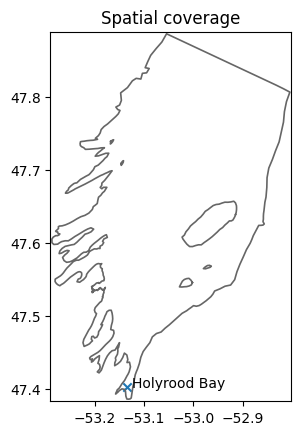

In [7]:
msh = mikeio.open("../input/ConceptionBay_mesh.mesh")
ms.plotting.spatial_overview(o, mod=msh);

Match the right model result timeseries and observation. Also, remove the bias (different vertical datum).

In [8]:
mr = ms.PointModelResult(ds[o.name+": Surface elevation"], name="MIKE21")
cmp = ms.match(obs=o, mod=mr).remove_bias()

## Skill table

In [9]:
cmp.skill().round(3)

,n,rmse,mae,cc,si,r2
observation,,,,,,
Holyrood Bay,84222,0.109,0.087,0.94,0.415,0.883


## Timeseries

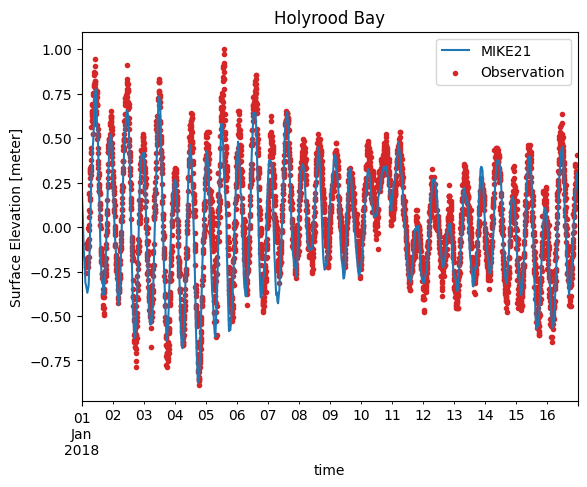

In [10]:
cmp.sel(time=slice("2018-01-01","2018-01-16")).plot.timeseries();

## Scatter plots

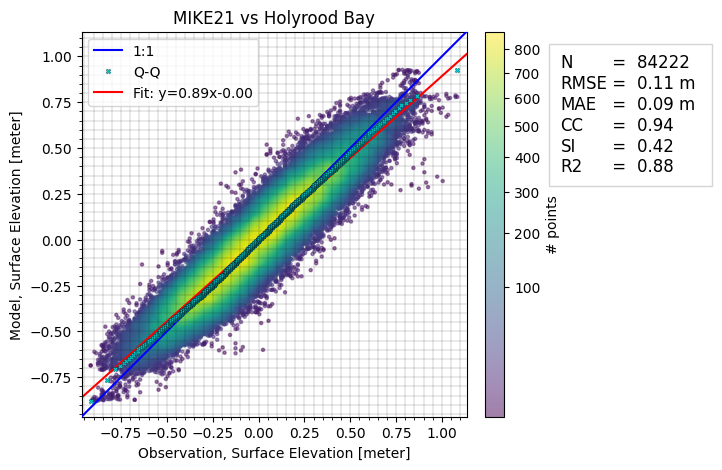

In [11]:
cmp.plot.scatter(skill_table=True, show_points=100_000, figsize=(6,5), bins=40);
if save_png:
    plt.savefig(f"{fig_fldr}modelskill_comparison_{cmp.name}.png", bbox_inches='tight');